In [1]:
from neural_net import *
import pandas as pd
import numpy as np
from numpy.random import normal as N
import math
import time
from evolving_neural_net import EvolvingNeuralNet
rng = np.random.default_rng()

In [2]:
datapoints = [
    (0.0, 1.0), (0.04, 0.81), (0.08, 0.52), (0.12, 0.2), (0.17, -0.12),
    (0.21, -0.38), (0.25, -0.54), (0.29, -0.58), (0.33, -0.51), (0.38, -0.34),
    (0.42, -0.1), (0.46, 0.16), (0.5, 0.39), (0.54, 0.55), (0.58, 0.61),
    (0.62, 0.55), (0.67, 0.38), (0.71, 0.12), (0.75, -0.19), (0.79, -0.51),
    (0.83, -0.77), (0.88, -0.95), (0.92, -1.0), (0.96, -0.91), (1.0, -0.7)
]

In [3]:
tanh = np.vectorize(lambda x: (math.e ** x - math.e ** -x) / (math.e ** x + math.e ** -x))
tanh_prime = np.vectorize(lambda x: 4 / ((math.e ** x + math.e ** -x) ** 2))

In [4]:
num_nodes_by_layer = [1, 10, 6, 3, 1]
num_nets = 15
activation_functions_and_derivatives = [[tanh, tanh_prime] for _ in range(4)]

In [5]:
evolving_neural_net = EvolvingNeuralNet(num_nodes_by_layer, num_nets, activation_functions_and_derivatives, datapoints, 0.01, 0.05)
evolving_neural_net.train(10, log=True)
print(evolving_neural_net.average_RSS)

{'Average RSS': matrix([[8.48731014]]), 'Average mutation rate': 0.048415380588741716}
Change in avg. RSS: [[-0.46546847]]
Change in avg. mutation rate -0.0015846194112582937
{'Average RSS': matrix([[8.41798097]]), 'Average mutation rate': 0.04951439989005871}
Change in avg. RSS: [[-0.06932916]]
Change in avg. mutation rate 0.0010990193013169919
{'Average RSS': matrix([[8.38485855]]), 'Average mutation rate': 0.04931494316178284}
Change in avg. RSS: [[-0.03312242]]
Change in avg. mutation rate -0.0001994567282758708
{'Average RSS': matrix([[8.36570005]]), 'Average mutation rate': 0.04574756881842899}
Change in avg. RSS: [[-0.0191585]]
Change in avg. mutation rate -0.0035673743433538505
{'Average RSS': matrix([[8.35432558]]), 'Average mutation rate': 0.04141891545087348}
Change in avg. RSS: [[-0.01137448]]
Change in avg. mutation rate -0.004328653367555509
{'Average RSS': matrix([[8.34981908]]), 'Average mutation rate': 0.040629086876347996}
Change in avg. RSS: [[-0.00450649]]
Change in

[]

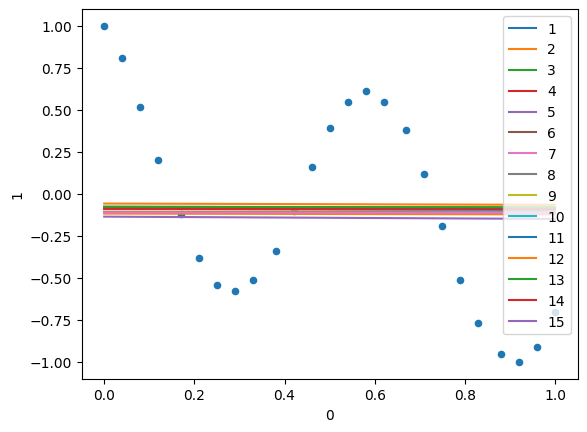

In [6]:
evolving_neural_net.plot().plot()

In [7]:
beginning = time.time()
data = [beginning, 0]

for i in range(500):
    neural_nets = next_generation(neural_nets)
    if time.time() - data[0] > 5:
        print(i + 1, 'completed;', (i - data[1]) / (time.time() - data[0]), 'per second in last interval;', (i + 1) / (time.time() - beginning), 'iter/s overall')
        data = [time.time(), i]
    print('avg RSS at generation', i + 1, sum(neural_net.compute_RSS() for neural_net in neural_nets) / 25)
    print('avg mutation rate', sum(neural_net.mutation_rate for neural_net in neural_nets) / 25)

NameError: name 'next_generation' is not defined

[]

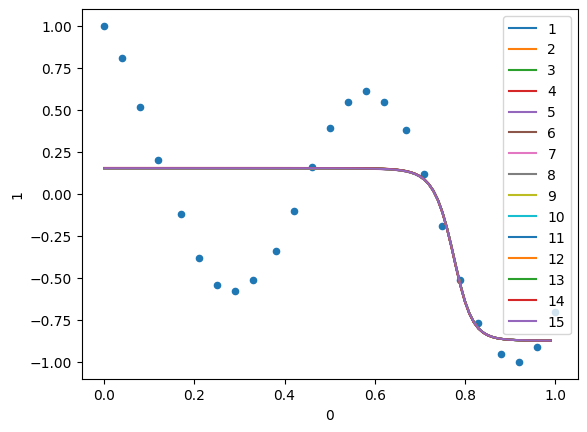

In [ ]:
neural_net_df = pd.DataFrame([[x / 100, *[float(neural_net.predict(np.matrix(x / 100))) for neural_net in neural_nets]]
                     for x in range(100)])
datapoint_df = pd.DataFrame(datapoints)
datapoint_plot = datapoint_df.plot(x=0, y=1, kind="scatter")
for i in range(15):
    datapoint_plot = neural_net_df.plot(ax=datapoint_plot, x=0, y=i+1)
datapoint_plot.plot()
